In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df_train = pd.read_csv("Train.csv")
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df_test = pd.read_csv("Test.csv")
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
df_train["Source"] = "train"
df_test["Source"] = "test"
df = pd.concat([df_train, df_test], axis=0)
df.shape

(14204, 13)

In [5]:
print("Train: {}".format(df_train.shape))
print("Test: {}".format(df_test.shape))

Train: (8523, 13)
Test: (5681, 12)


Test data **doesn't have "Item_Outlet_Sales" (target variable)**

### Data Exploration

In [6]:
df.shape

(14204, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage

In [8]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [9]:
# Missing values on "Item_Weight"
df_isna = df[df["Item_Weight"].isna()]
df_isna

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,train
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680,train
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432,train
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,train
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5656,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5661,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test
5665,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN,test


In [10]:
count = 0
for item_type in df["Item_Type"].unique():
    if item_type in df_isna["Item_Type"].unique():
        count += 1
        
if count == len(df_isna["Item_Type"].unique()):
    print("Amount of different item types in two datasets are same")
else:
    print("Amount of different item types in two datasets are different")

Amount of different item types in two datasets are same


We will impute the missing values in **"Item_Weight"** column by using its **median or mean**.

In [11]:
# Missing values on "Outlet_Size"
df_isna1 = df[df["Outlet_Size"].isna()]
df_isna1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986,train
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,train
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,train
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5668,FDC44,15.600,Low Fat,0.288892,Fruits and Vegetables,115.1518,OUT010,1998,NaN,Tier 3,Grocery Store,NaN,test
5670,FDO03,10.395,Regular,0.037092,Meat,229.4352,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [12]:
# Check on Outlet_Identifier column in df_isna1
df_isna1["Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [13]:
for outlet in df_isna1["Outlet_Identifier"].unique():
    if type(df[df["Outlet_Identifier"] == outlet]["Outlet_Size"].unique()[0]) == str:
        print(f"{outlet}\'s size: {df[df['Outlet_Identifier'] == outlet]['Outlet_Size'].unique()}")
    else:
        print(f"{outlet}'s size: nan")

OUT010's size: nan
OUT045's size: nan
OUT017's size: nan


Outlet Size's missing values are on outlet **"OUT010", "OUT045", "OUT017"**. So, we will impute the missing values by **using its mode**.

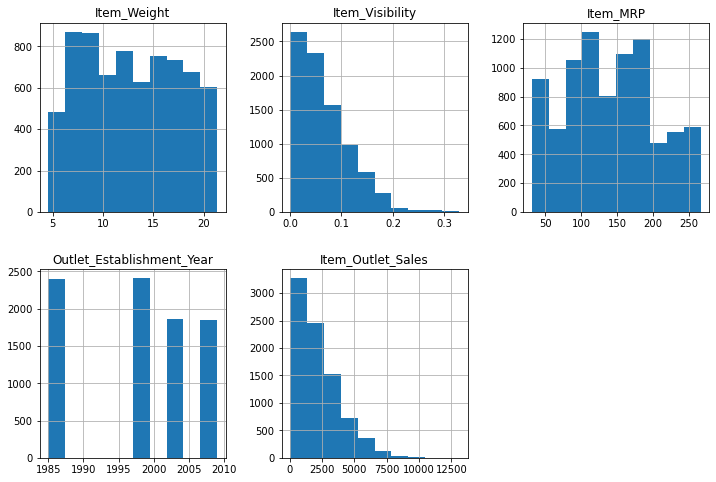

In [14]:
df_train.hist(figsize=(12, 8), layout=(2, 3));

In [15]:
# Item_Visibility can't be zero
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [16]:
# Imputation
df.loc[df["Item_Visibility"] == 0, "Item_Visibility"] = df_train["Item_Visibility"].median()

In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Source                          0
dtype: int64

In [18]:
# Imputation
df["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)
df["Outlet_Size"].fillna(df_train["Outlet_Size"].mode().values[0], inplace=True)

In [19]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

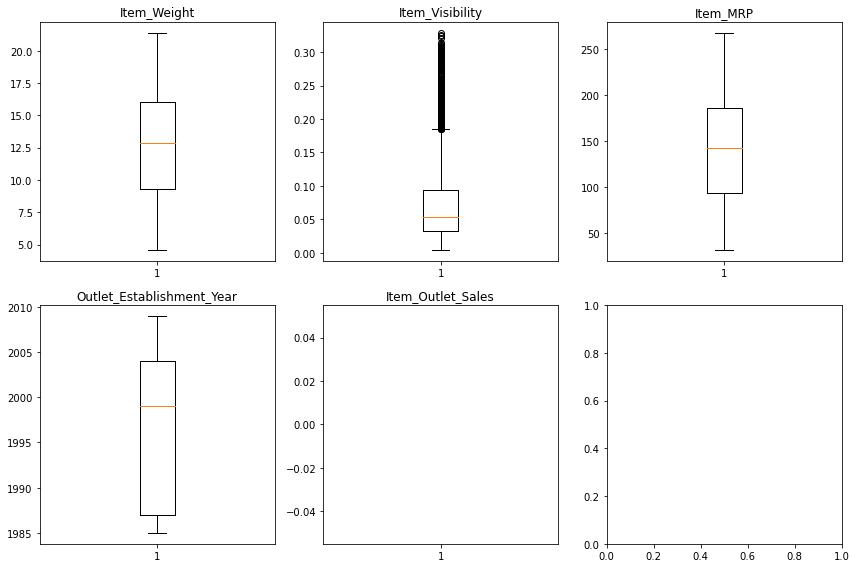

In [20]:
num_cols = list(df.dtypes[(df.dtypes) != "O"].index)
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

count = 0
for i in range(2):
    for j in range(3):
        if count < len(num_cols):
            axs[i, j].boxplot(df[num_cols[count]])
            axs[i, j].set_title(num_cols[count])
            count += 1
            
plt.tight_layout()
plt.show()

### Data Exploration (Categorical)

In [21]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.053931,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [22]:
df.describe(include="O")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source
count,14204,14204,14204,14204,14204,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,8485,2013,1559,8671,5583,9294,8523


We **won't consider "Item_Identifier"** because it is also assumed to be **affected by "Item_Type"**

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

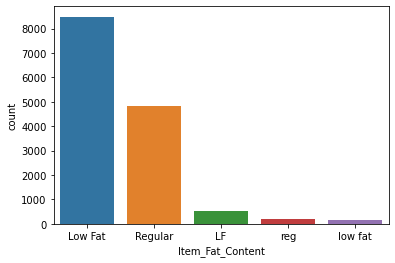

In [23]:
# Item Fat Content
sns.countplot(x=df["Item_Fat_Content"], order=df["Item_Fat_Content"].value_counts().index)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

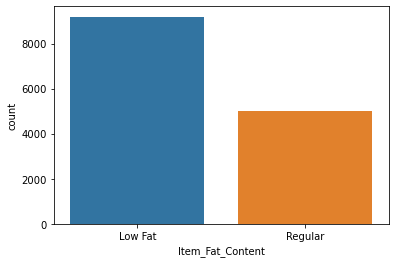

In [24]:
df["Item_Fat_Content"].replace({"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"}, inplace=True)
sns.countplot(x=df["Item_Fat_Content"], order=df["Item_Fat_Content"].value_counts().index)

#### More Exploration on Item Fat Content

In [25]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [26]:
# More exploration on "Others"
df[df["Item_Type"] == "Others"]["Item_Identifier"].unique()

array(['NCN07', 'NCO55', 'NCM43', 'NCN55', 'NCO07', 'NCM31', 'NCK19',
       'NCO43', 'NCK31', 'NCM07', 'NCM55', 'NCL19', 'NCQ43', 'NCQ38',
       'NCP50', 'NCM19', 'NCI31', 'NCN14', 'NCL55', 'NCN43', 'NCJ31',
       'NCP43', 'NCP55', 'NCL31', 'NCO02', 'NCM26', 'NCN19', 'NCK07',
       'NCL07', 'NCJ19'], dtype=object)

In [27]:
# More exploration on value "NC"
df[df["Item_Identifier"].apply(lambda x: x[:2]) == "NC"]["Item_Type"].unique()

array(['Household', 'Health and Hygiene', 'Others'], dtype=object)

In [28]:
# There is no fat in "NC" products, however there is
df[df["Item_Identifier"].apply(lambda x: x[:2]) == "NC"]["Item_Fat_Content"].value_counts()

Low Fat    2686
Name: Item_Fat_Content, dtype: int64

In [29]:
# Replace the value with "No Consumed"
df.loc[df["Item_Identifier"].apply(lambda x: x[:2]) == "NC", "Item_Fat_Content"] = "No Consumed"
df["Item_Fat_Content"].value_counts()

Low Fat        6499
Regular        5019
No Consumed    2686
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

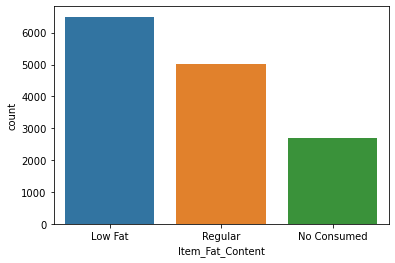

In [30]:
sns.countplot(x=df["Item_Fat_Content"], order=df["Item_Fat_Content"].value_counts().index)

### Another Data Visualization

In [31]:
df.describe(include="O")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source
count,14204,14204,14204,14204,14204,14204,14204,14204
unique,1559,3,16,10,3,3,4,2
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,6499,2013,1559,8671,5583,9294,8523


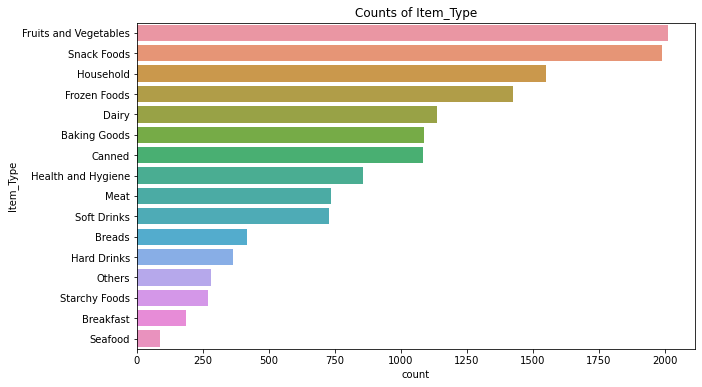

In [32]:
# Item_Type
plt.figure(figsize=(10, 6))
sns.countplot(y=df["Item_Type"], order=df["Item_Type"].value_counts().index)
plt.title("Counts of Item_Type")
plt.show()

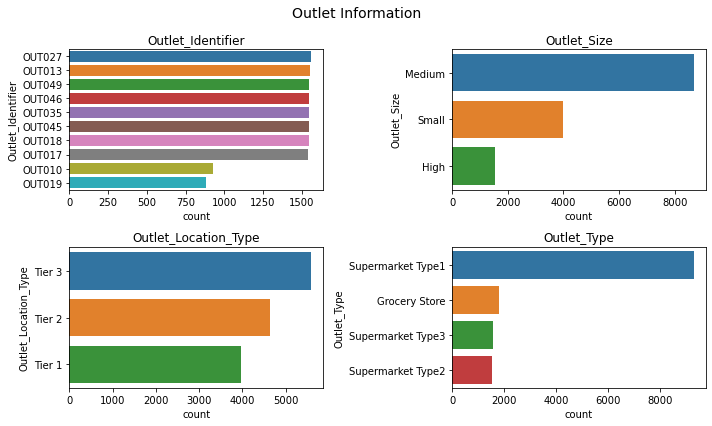

In [33]:
outlet_cols = df.describe(include="O").columns[-5:-1]
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

plt.suptitle("Outlet Information", fontsize=14)
count = 0
for i in range(2):
    for j in range(2):
        sns.countplot(y=df[outlet_cols[count]], order=df[outlet_cols[count]].value_counts().index, ax=axs[i, j])
        axs[i, j].set_title(outlet_cols[count])
        count += 1

plt.tight_layout()
plt.show()

**Most of outlets' sales are uniformly distributed**. More specificly, most of transactions come to outlet whose **size is medium, location is third-tier, and type is supermarket type 1**.

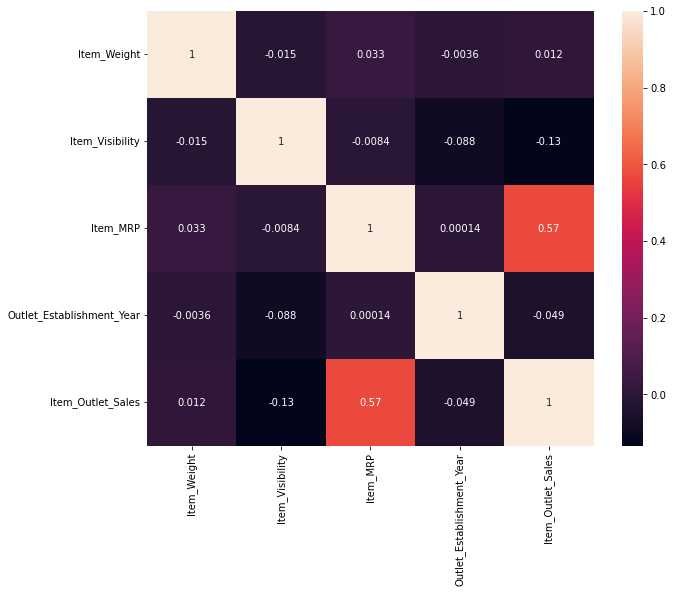

In [34]:
# Correlation map
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True);

By numerical features, **Item_MRP** has the highest correlation on Item_Outlet_Sales

### Data Preprocessing

In [35]:
preprocessed_data = df.copy()

#### Drop Irrelevant Columns

In [36]:
# Since each outlets' information is unique, so outlet's additional information 
# such as "Outlet Establishment Year" up to "Outlet Type" can be removed
preprocessed_data.drop(['Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'], axis=1, inplace=True)
preprocessed_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,2097.2700,train
3,FDX07,19.20,Regular,0.053931,Fruits and Vegetables,182.0950,OUT010,732.3800,train
4,NCD19,8.93,No Consumed,0.053931,Household,53.8614,OUT013,994.7052,train


#### One Hot Encoding

In [37]:
preprocessed_data_train = df[df["Source"] == "train"]
preprocessed_data_test = df[df["Source"] == "test"]

In [38]:
# Item Fat Content
print("Unique values of Item_Fat_Content (train): {}".format(preprocessed_data_train["Item_Fat_Content"].nunique()))
print("Unique values of Item_Fat_Content (test): {}".format(preprocessed_data_test["Item_Fat_Content"].nunique()))

Unique values of Item_Fat_Content (train): 3
Unique values of Item_Fat_Content (test): 3


In [39]:
# Item Type
print("Unique values of Item_Type (train): {}".format(preprocessed_data_train["Item_Type"].nunique()))
print("Unique values of Item_Type (test): {}".format(preprocessed_data_test["Item_Type"].nunique()))

Unique values of Item_Type (train): 16
Unique values of Item_Type (test): 16


In [40]:
# Assumed the dimension of data is not high enough after doing one hot encoding
preprocessed_data.shape

(14204, 9)

In [41]:
preprocessed_data = pd.get_dummies(preprocessed_data, columns=["Item_Fat_Content", "Item_Type", "Outlet_Identifier"])
preprocessed_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Item_Outlet_Sales', 'Source', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_No Consumed', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049'],
      dtype='object')

In [42]:
preprocessed_data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source,Item_Fat_Content_Low Fat,Item_Fat_Content_No Consumed,Item_Fat_Content_Regular,Item_Type_Baking Goods,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.30,0.016047,249.8092,3735.1380,train,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,443.4228,train,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,2097.2700,train,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.053931,182.0950,732.3800,train,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.053931,53.8614,994.7052,train,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Feature Selection

In [43]:
preprocessed_data.drop(["Item_Identifier"], axis=1, inplace=True)
preprocessed_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source,Item_Fat_Content_Low Fat,Item_Fat_Content_No Consumed,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0.016047,249.8092,3735.1380,train,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,443.4228,train,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,train,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.053931,182.0950,732.3800,train,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.053931,53.8614,994.7052,train,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Train Test Split

In [44]:
# Train Test Split
train_data = preprocessed_data[preprocessed_data["Source"] == "train"]
test_data = preprocessed_data[preprocessed_data["Source"] == "test"]

# Input and Targets
X_train = train_data.drop(["Item_Outlet_Sales", "Source"], axis=1)
X_test = test_data.drop(["Item_Outlet_Sales", "Source"], axis=1)
Y_train = train_data["Item_Outlet_Sales"]

In [45]:
X_train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_No Consumed,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0.016047,249.8092,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.053931,182.0950,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.053931,53.8614,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


### Test

In [46]:
train_data

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Source,Item_Fat_Content_Low Fat,Item_Fat_Content_No Consumed,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.300,0.016047,249.8092,3735.1380,train,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,48.2692,443.4228,train,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,141.6180,2097.2700,train,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.053931,182.0950,732.3800,train,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.053931,53.8614,994.7052,train,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,train,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,549.2850,train,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
8520,10.600,0.035186,85.1224,1193.1136,train,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8521,7.210,0.145221,103.1332,1845.5976,train,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### Model Building

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

models = [("Linear Regression", LinearRegression()), 
          ("Support Vector Machine", SVR()), 
          ("Decision Tree", DecisionTreeRegressor()),
          ("Random Forest", RandomForestRegressor()),
          ("XGBoost", XGBRegressor())
         ]

In [48]:
from sklearn.model_selection import cross_val_score, KFold

names = []
scores = []

fold_5 = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models:
    score = -cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=fold_5).mean()
    scores.append(score)
    names.append(name)

In [49]:
model_summary = pd.DataFrame(data={"Model": names, "MSE": scores})
model_summary.sort_values("MSE", ascending=True)

,Model,MSE
3,Random Forest,1.278393e+06
0,Linear Regression,1.281128e+06
4,XGBoost,1.355708e+06
2,Decision Tree,2.323723e+06
1,Support Vector Machine,2.375683e+06


**Random Forest** is the best machine learning model for this case.

### Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": (1000, 2000),
    "criterion": ("squared_error", "friedman_mse"),
    "max_depth": (7, 9),
}

rf = RandomForestRegressor()
grid_cv = GridSearchCV(rf, param_grid=params, scoring="neg_mean_squared_error", cv=3)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'friedman_mse'),
                         'max_depth': (7, 9), 'n_estimators': (1000, 2000)},
             scoring='neg_mean_squared_error')

In [51]:
grid_cv.best_params_

{'criterion': 'friedman_mse', 'max_depth': 7, 'n_estimators': 1000}

In [52]:
grid_df = pd.DataFrame(data=grid_cv.cv_results_)
grid_df.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
4,19.290406,0.378948,0.387174,0.004677,friedman_mse,7,1000,"{'criterion': 'friedman_mse', 'max_depth': 7, ...",-1.198168e+06,-1.163866e+06,-1.167809e+06,-1.176614e+06,15325.499743,1
1,38.332075,0.678753,0.741450,0.031659,squared_error,7,2000,"{'criterion': 'squared_error', 'max_depth': 7,...",-1.199584e+06,-1.163527e+06,-1.167737e+06,-1.176949e+06,16097.301870,2
0,19.501831,0.244580,0.429134,0.035755,squared_error,7,1000,"{'criterion': 'squared_error', 'max_depth': 7,...",-1.200140e+06,-1.164479e+06,-1.166707e+06,-1.177109e+06,16310.967249,3
5,38.574018,0.896328,0.790241,0.027820,friedman_mse,7,2000,"{'criterion': 'friedman_mse', 'max_depth': 7, ...",-1.199592e+06,-1.164590e+06,-1.168907e+06,-1.177696e+06,15582.252713,4
6,24.353294,0.700926,0.475156,0.026275,friedman_mse,9,1000,"{'criterion': 'friedman_mse', 'max_depth': 9, ...",-1.210156e+06,-1.169143e+06,-1.177074e+06,-1.185458e+06,17762.162222,5


### Model Building (Final)

In [53]:
rf = RandomForestRegressor(n_estimators=2000, criterion="friedman_mse", max_depth=7)
rf.fit(X_train, Y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=7, n_estimators=2000)

In [54]:
rf.score(X_train, Y_train)

0.6330012296161724

In [55]:
feature_importances = pd.DataFrame(data={"Feature": X_train.columns, "Feature Importance": rf.feature_importances_})
feature_importances.sort_values("Feature Importance", ascending=False).head()

,Feature,Feature Importance
2,Item_MRP,0.540248
27,Outlet_Identifier_OUT027,0.164849
26,Outlet_Identifier_OUT019,0.131449
22,Outlet_Identifier_OUT010,0.130962
1,Item_Visibility,0.015704


**Item MRP** and some of **Outlet Identifier** are important features to predict the dependent variable.

### Model Evaluation

In [56]:
num_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

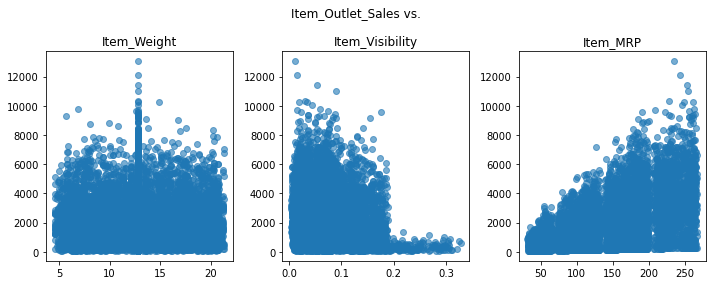

In [57]:
# Check on each Numerical Independent Variable vs Dependent Variable
fig, axs = plt.subplots(1, 3, figsize=(10, 4))
plt.suptitle("Item_Outlet_Sales vs.")

count = 0
for i in range(3):
    axs[i].scatter(train_data[num_cols[count]], train_data["Item_Outlet_Sales"], alpha=0.6)
    axs[i].set_title(f"{num_cols[count]}")
    count += 1
        
plt.tight_layout()
plt.show()

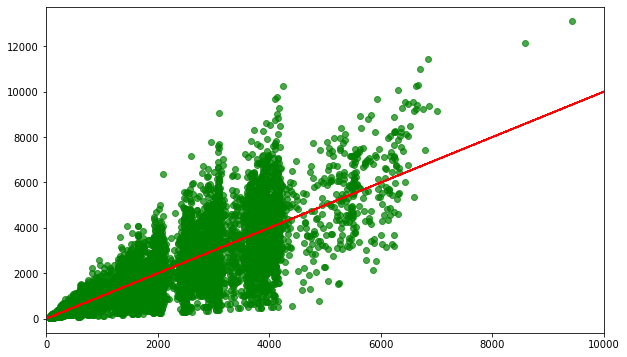

In [58]:
# How accurate our model is
y_pred = rf.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, Y_train, c="green", alpha=0.7)
plt.plot(Y_train, Y_train, c="red")
plt.xlim([0, 10000])
plt.show()

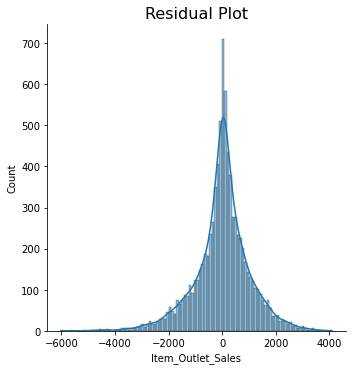

In [59]:
sns.displot(y_pred - Y_train, kde=True)
plt.title("Residual Plot", fontsize=16)
plt.show()

### Conclusion

**Since each independent variable is plotted with dependent variable, dependent variable move linearly, yet not significantly**. Therefore, linear regression is nearly fitted to be the solution for this problem. In previous summary, we have Random Forest Regressor whose performance is the best among 5 algorithms.

Moreover, we can improve this model by doing either **standardization**, **feature engineering (creating variables)**, or **change model to linear regression**.